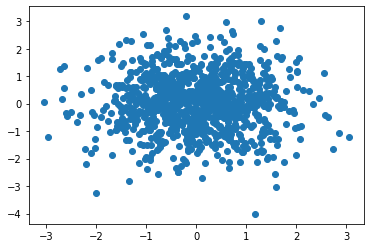

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

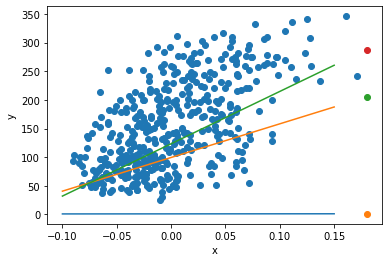

In [53]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer

#############################
# prepare datasets
#############################
diabetes = load_diabetes()
x = diabetes.data[:,2]
y = diabetes.target
print(diabetes.DESCR)


#############################
# traing
#############################
w, b = 1.0, 1.0
w0, b0 = w, b
w1, b1 = 0, 0
epochs = 100
for i in range(1, epochs):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
    if i == 1:
      w1, b1 = w, b

print("w0, b0     : ", w0, b0)
print("w1, b1     : ", w1, b1)
print("w100, b100 : ", w, b)


#############################
# prediction
#############################
x_new = 0.18
y_pred_t1 = x_new * w1 + b1
y_pred_t100 = x_new * w + b
print("y_pred_t1, y_pred_t100 : ", y_pred_t1, y_pred_t100)


#############################
# display model
#############################
def make_point(w, b):
  start_x, end_x = -0.1, 0.15
  return ((start_x, start_x * w + b), (end_x, end_x * w + b))

# before training
pt1_0, pt2_0 = make_point(w0, b0)
plt.plot([pt1_0[0], pt2_0[0]], [pt1_0[1], pt2_0[1]])

# traing once
pt1_1, pt2_1 = make_point(w1, b1)
plt.plot([pt1_1[0], pt2_1[0]], [pt1_1[1], pt2_1[1]])

# traing 100 times
pt1_100, pt2_100 = make_point(w, b)
plt.plot([pt1_100[0], pt2_100[0]], [pt1_100[1], pt2_100[1]])

plt.scatter(x, y)
plt.scatter(x_new, y_pred_t0)
plt.scatter(x_new, y_pred_t1)
plt.scatter(x_new, y_pred_t100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred_t1, y_pred_t100 :  205.22513736505664 287.8416643899983


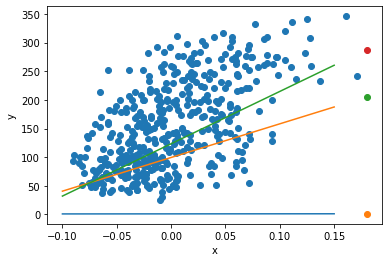

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

#############################
# Make neuron
#############################
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
      
  def predict(self, x):
    return x * self.w + self.b


#############################
# training & predicting
#############################
def make_point(w, b):
  start_x, end_x = -0.1, 0.15
  return ((start_x, start_x * w + b), (end_x, end_x * w + b))

x = diabetes.data[:,2] 
y = diabetes.target
neuron = Neuron()
pred_x = 0.18

# before training
y_pred_t0 = neuron.predict(pred_x)
pt1_0, pt2_0 = make_point(neuron.w, neuron.b)
plt.plot([pt1_0[0], pt2_0[0]], [pt1_0[1], pt2_0[1]])

# traing once
neuron.fit(x, y, 1)
y_pred_t1 = neuron.predict(pred_x)
pt1_1, pt2_1 = make_point(neuron.w, neuron.b)
plt.plot([pt1_1[0], pt2_1[0]], [pt1_1[1], pt2_1[1]])

# traing 100 times
neuron.fit(x, y, 100)
y_pred_t100 = neuron.predict(pred_x)
pt1_100, pt2_100 = make_point(neuron.w, neuron.b)
plt.plot([pt1_100[0], pt2_100[0]], [pt1_100[1], pt2_100[1]])


#############################
# display model
#############################
print("y_pred_t1, y_pred_t100 : ", y_pred_t1, y_pred_t100)
plt.scatter(x, y)
plt.scatter(pred_x, y_pred_t0)
plt.scatter(pred_x, y_pred_t1)
plt.scatter(pred_x, y_pred_t100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
  

추가 예제 : 당뇨병 발병 확률 예측 모델
https://partrita.github.io/posts/ML-by-Keras/
